In [248]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statistics
from pandas import DataFrame, Series
%matplotlib inline

In [ ]:
!head complaints_dec_2014.csv

In [249]:
consumer_compl = pd.read_csv('complaints_dec_2014.csv')

In [22]:
consumer_compl.head()

,Complaint ID,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Submitted via,Date received,Date sent to company,Company,Company response,Timely response?,Consumer disputed?
0,1177167,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068.0,Web,12/31/2014,12/31/2014,Ad Astra Recovery Services Inc,Closed with explanation,Yes,NaN
1,1177166,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068.0,Web,12/31/2014,12/31/2014,"Unique Management Services, Inc",Closed with explanation,Yes,NaN
2,1177165,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068.0,Web,12/31/2014,12/31/2014,"CL Holdings, LLC",Closed with monetary relief,Yes,NaN
3,1177164,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068.0,Web,12/31/2014,12/31/2014,"Enhanced Recovery Company, LLC",Closed with non-monetary relief,Yes,NaN
4,1177163,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068.0,Web,12/31/2014,12/31/2014,"Enhanced Acquisitions, LLC",Closed with explanation,Yes,NaN


# Number of complaints by product

In [62]:
consumer_compl_by_prodc = consumer_compl[['Complaint ID', 'Product']].copy()

In [63]:
consumer_compl_by_prodc.columns

Index(['Complaint ID', 'Product'], dtype='object')

In [148]:
consumer_compl_by_prodc = consumer_compl_by_prodc.sort_values(by=['Product', 'Complaint ID'], ascending=[True, False])

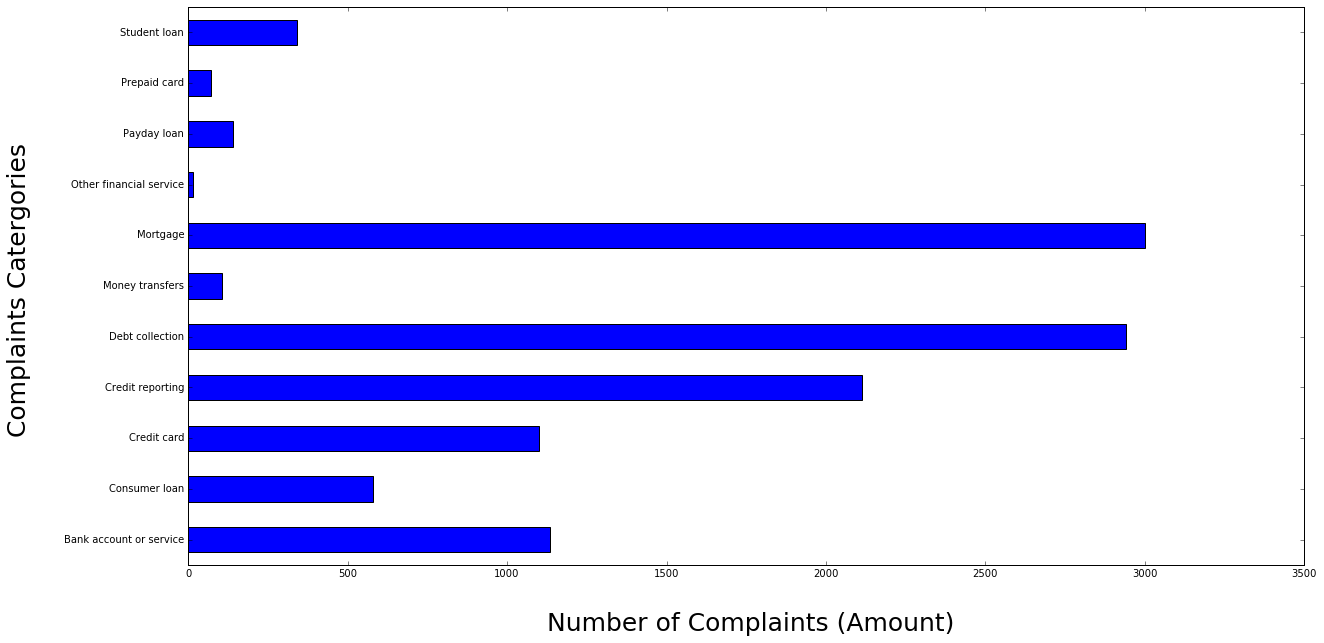

In [110]:
x = consumer_compl_by_prodc.groupby('Product').size()
plt.figure(figsize=(20, 10)) 
x.plot.barh()
plt.xlabel("\n Number of Complaints (Amount)", fontsize=25)
plt.ylabel("Complaints Catergories \n",fontsize=25 )
plt.show()

# Number of complaints by company (top 10 companies only)

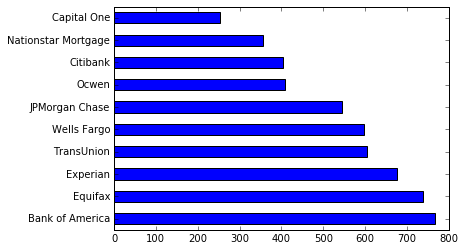

In [219]:
consumer_compl.pop('Company').value_counts().head(10).plot('barh')
plt.show()

# Number of complaints by company response

In [238]:
response = consumer_compl[['Company response']].copy()

In [239]:
yu = response.groupby('Company response').size()

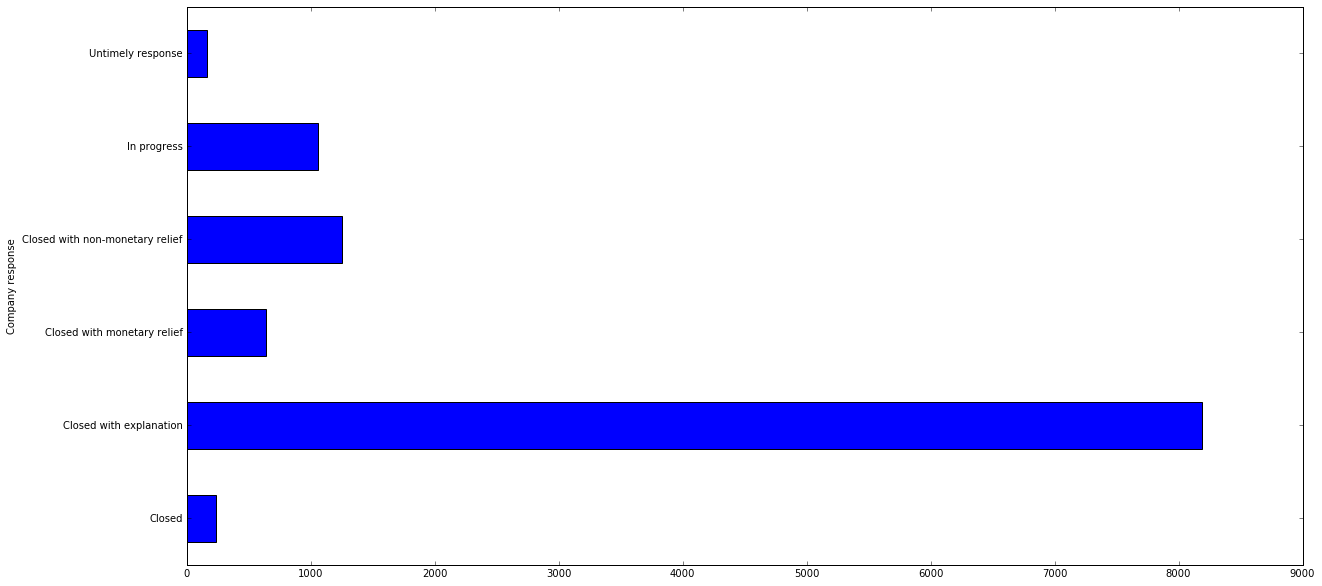

In [241]:
plt.figure(figsize=(20, 10)) 
yu.plot.barh()

# Mean number of complaints by day of week

In [250]:
tu_date = consumer_compl.pop('Date received')

In [251]:
consumer_compl.index = pd.to_datetime(tu_date, format='%m/%d/%Y')

In [252]:
consumer_compl['Weekdays'] = consumer_compl.index.weekday

In [238]:
consumer_compl.head()

,Complaint ID,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Submitted via,Date sent to company,Company,Company response,Timely response?,Consumer disputed?,Weekdays
Date received,,,,,,,,,,,,,,
2014-12-31,1177167,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068.0,Web,12/31/2014,Ad Astra Recovery Services Inc,Closed with explanation,Yes,NaN,2
2014-12-31,1177166,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068.0,Web,12/31/2014,"Unique Management Services, Inc",Closed with explanation,Yes,NaN,2
2014-12-31,1177165,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068.0,Web,12/31/2014,"CL Holdings, LLC",Closed with monetary relief,Yes,NaN,2
2014-12-31,1177164,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068.0,Web,12/31/2014,"Enhanced Recovery Company, LLC",Closed with non-monetary relief,Yes,NaN,2
2014-12-31,1177163,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,77068.0,Web,12/31/2014,"Enhanced Acquisitions, LLC",Closed with explanation,Yes,NaN,2


In [254]:
week_days = consumer_compl.groupby('Weekdays').size()

In [255]:
week_days

Weekdays
0    2544
1    2580
2    2289
3    1634
4    1446
5     543
6     507
dtype: int64

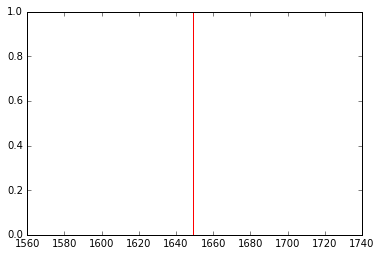

In [256]:
mean_days = statistics.mean(week_days)
ymin, ymax = plt.ylim()
plt.vlines(mean_days, ymin, ymax, color='red')

In [125]:
week_days.mean()

1649.0